This notebook shows an implementation of the epsilon "hard" support vector regression on a dataset of points that follows a linear function.

**Model:**

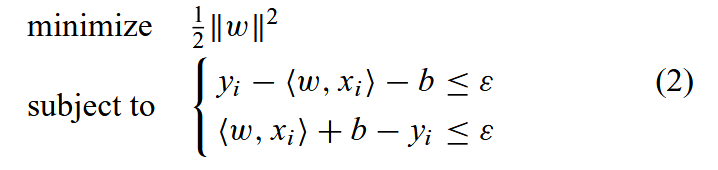

**Remarks:**
- The epsilon hard support vector regression function has been "self"-coded in the module `sv_machines.prediction_functions.epsilon_sv_regression` since the scikit.learn implementation `sklearn.svm.LinearSVR` offers only the version with slack variables *(one cannot set the parameter $C$ to 0)*. We used the third party python library `cvxpy` to solve the convex optimization problem returning the parameters.

In [1]:
%load_ext autoreload
%autoreload 2

# Local imports
from sv_machines.datasets.line import get_line_dataset, get_line_plot
from sv_machines.prediction_functions.epsilon_sv_regression import get_epsilon_sv_function

# Load a line dataset

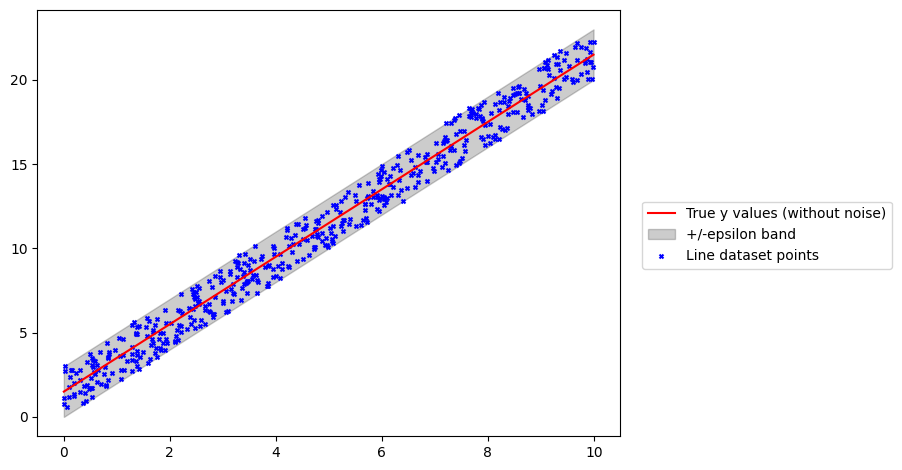

In [2]:
slope, offset, epsilon = 2.0, 1.5, 1.5

x_line, y_line = get_line_dataset(slope=slope, offset= offset, epsilon=epsilon, num_points=500, epsilon_strict=True)
fig, ax = get_line_plot(x_line, y_line, slope, offset, epsilon, with_true_function=True)
fig.tight_layout() 
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Perfom $\varepsilon$ "hard" support vector regression on the dataset

We perform it with 3 different values of epsilon on the dataset above:
- $\varepsilon \times 1.01$ *(almost exactly the value of epsilon for the data)*
- $\varepsilon \times 2$ *(twice the value of epsilon for the data to show the result when the algorithm has more "freedom" than needed)*
- $\varepsilon \times 0.5$ $\rightarrow$ *the optimizer should return that the problem is infeasible.

x_line shape: (500, 1)
y_line shape: (500, 1)
Regression function obtained is y= [[1.99877743]]^T * x + [1.50758744]


NameError: name 'np' is not defined

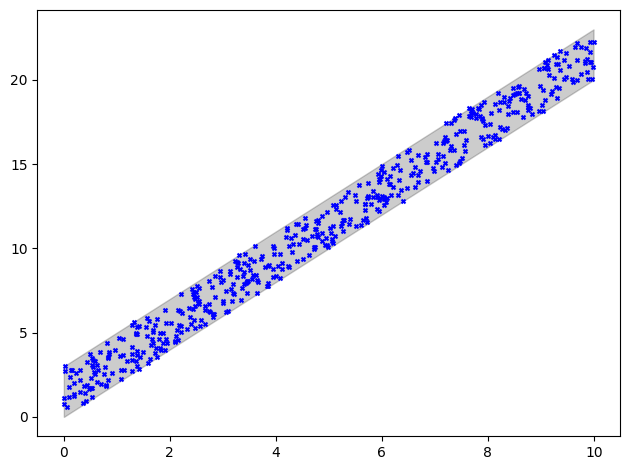

In [3]:
svr_function_1, svr_params_1 = get_epsilon_sv_function(x_line, y_line, epsilon)

fig, ax = get_line_plot(
    x_line, y_line, slope, offset, epsilon, with_true_function=False
)
x_regession_1 = np.linspace(min(x_line), max(x_line), 100)
y_regression_1 = svr_function_1(x_regession_1)
ax.plot(x_regession_1, y_regression_1, linestyle="--", linewidth=3, color="orange", label='Epsilon-Hard SVR Prediction')

fig.suptitle(f"Epsilon-Hard SVR Regression for espilon = {epsilon}", fontsize=10)
fig.tight_layout()
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

For epsilon larger than the actual epsilon band of the data, notice how the algorithm outputs the flatest prediction function possible.

x_line shape: (500, 1)
y_line shape: (500, 1)
Regression function obtained is y= [[1.67121677]]^T * x + [3.03785196]


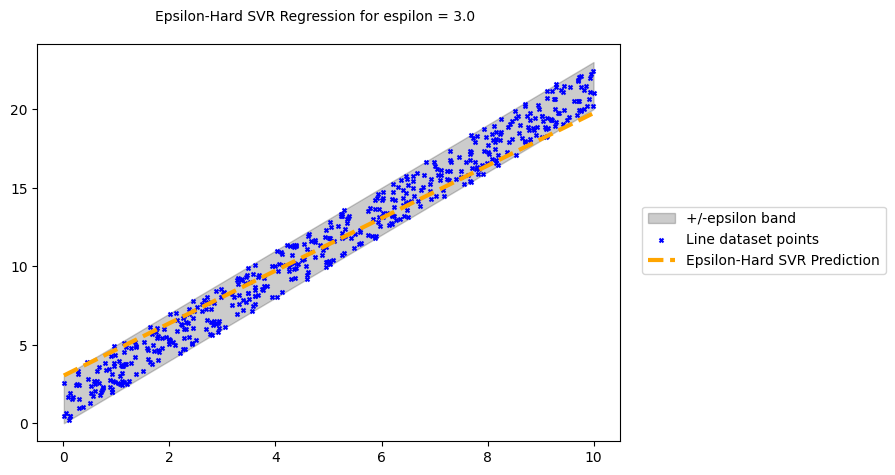

In [ ]:
epsilon_2 = epsilon * 2
svr_function_2, svr_params_2 = get_epsilon_sv_function(x_line, y_line, epsilon_2)

fig_2, ax_2 = get_line_plot(
    x_line, y_line, slope, offset, epsilon, with_true_function=False
)
x_regession_2 = np.linspace(min(x_line), max(x_line), 100)
y_regression_2 = svr_function_2(x_regession_2)
ax_2.plot(x_regession_2, y_regression_2, linestyle="--", linewidth=3, color="orange", label='Epsilon-Hard SVR Prediction')

fig_2.suptitle(f"Epsilon-Hard SVR Regression for espilon = {epsilon_2}", fontsize=10)
fig_2.tight_layout()
fig_2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

For epsilon set too small notice that the problem is infeasible and the optimization algorithm thus wrong return any value.

In [ ]:
epsilon_3 = epsilon / 2
svr_function_3, svr_params_3 = get_epsilon_sv_function(x_line, y_line, epsilon_3, verbose=True)
print(svr_params_3["min_val"])


(CVXPY) Nov 28 08:21:28 PM: Your problem has 2 variables, 1000 constraints, and 0 parameters.
(CVXPY) Nov 28 08:21:28 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 28 08:21:28 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 28 08:21:28 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 28 08:21:28 PM: Your problem is compiled with the CPP canonicalization backend.
(CVXPY) Nov 28 08:21:28 PM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 28 08:21:28 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Nov 28 08:21:28 PM: Applying reduction CvxAttr2Constr
(CVXPY) Nov 28 08:21:28 PM: Applying reduction Qp2SymbolicQp
(CVXPY) Nov 28 08:21:28 PM: Applying reduction QpMatrixStuffing
(CVXPY) Nov 28 08:21:28 PM: Applying reduction OSQP
(CVXPY) Nov 28 08:21:28 PM: Finished problem compilation (

x_line shape: (500, 1)
y_line shape: (500, 1)
                                     CVXPY                                     
                                     v1.7.4                                    
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
-----------------------------------------------------------------
           OSQP v1.0.0  -  Operator Splitting QP Solver
              (c) The OSQP Developer Team
-----------------------------------------------------------------
problem:  variables n = 2, constraints m = 1000
          nnz(P) + nnz(A) = 2001
set